In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('TSLA.csv')

# Convert date columns to date type
data['Date'] = pd.to_datetime(data['Date'])

# Set the date column as index
data.set_index('Date', inplace=True)

summary_stats = data[['Open', 'Close', 'High', 'Low', 'Volume', 'Money', 'daily_return']].agg(['mean', 'median', 'min', 'max'])


summary_stats

,Open,Close,High,Low,Volume,Money,daily_return
mean,321.981268,322.042042,329.069697,314.640303,2.402850e+07,7.823119e+09,0.001619
median,241.355000,241.345000,245.035000,236.590000,7.201964e+06,1.177522e+09,0.001255
min,21.930000,21.950000,23.000000,21.500000,2.395950e+05,0.000000e+00,-0.774862
max,2295.120000,2238.750000,2318.490000,2186.520000,3.065906e+08,1.510250e+11,0.244174


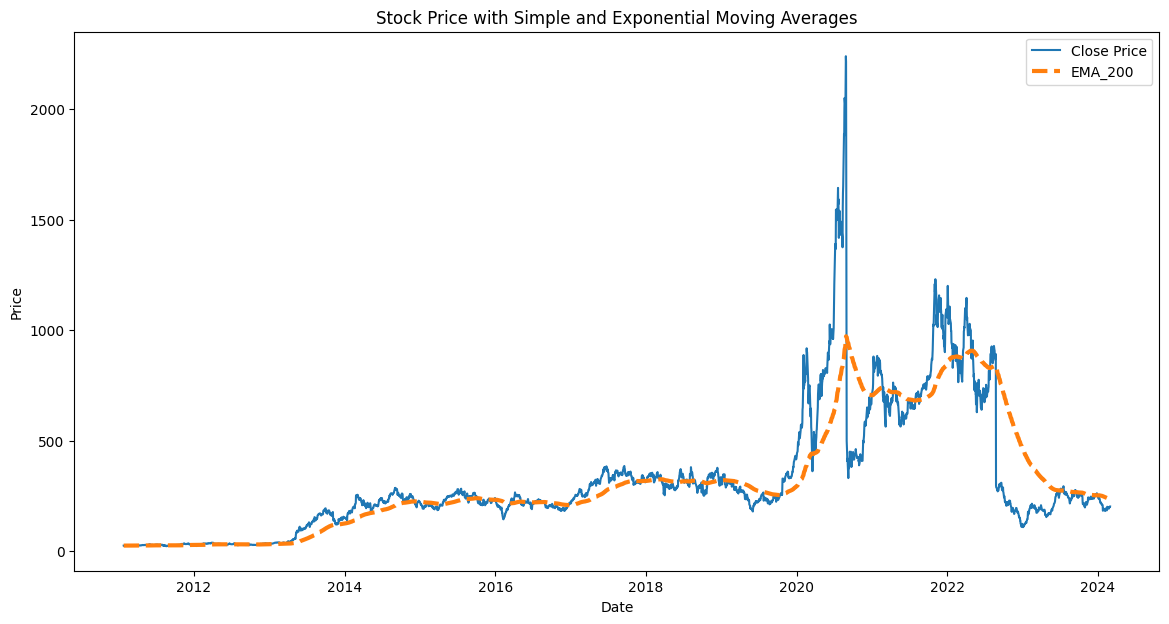

In [6]:
# Calculating the 200-day moving average (SMA)

data['EMA_200'] = data['Close'].ewm(span=200, adjust=False).mean()

# Visualizing Prices and Moving Averages
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', linewidth=1.5)

plt.plot(data['EMA_200'], label='EMA_200', linestyle='--', linewidth=3)


plt.title('Stock Price with Simple and Exponential Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

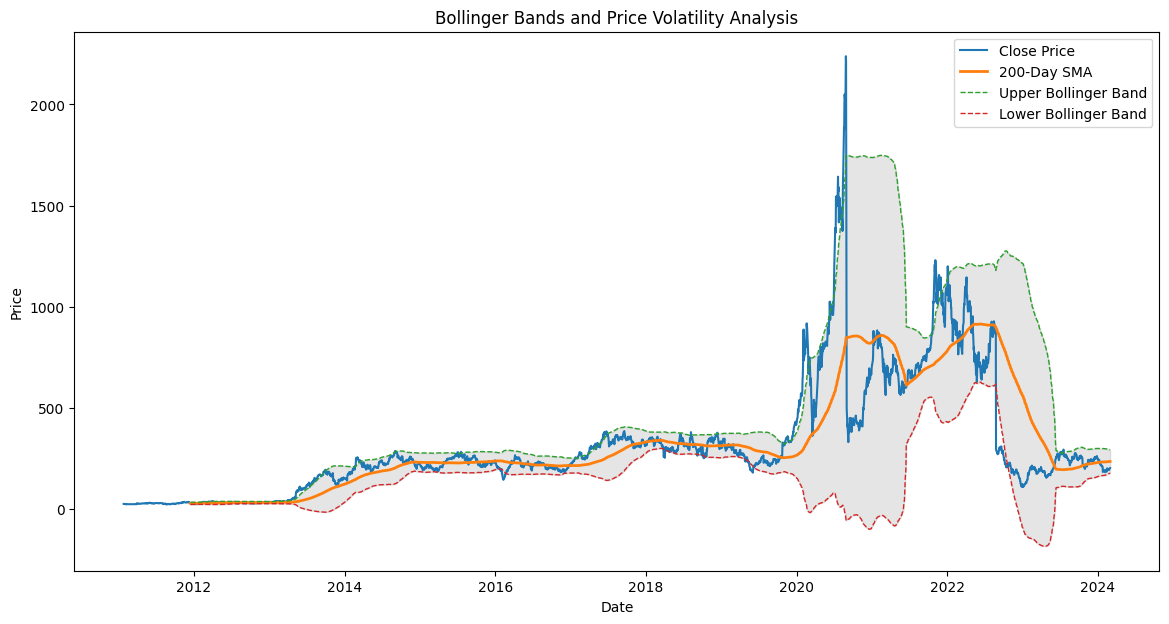

In [7]:
# Calculate the 200-day simple moving average (SMA) as the basis for the Bollinger Bands
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Calculate the 200-day standard deviation
data['STD_200'] = data['Close'].rolling(window=200).std()

# Calculating the upper and lower Bollinger Bands
data['Upper_Band'] = data['SMA_200'] + (data['STD_200'] * 2)
data['Lower_Band'] = data['SMA_200'] - (data['STD_200'] * 2)

# Visualize Bollinger Bands, Closing Price, and SMA in the middle
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', linewidth=1.5)
plt.plot(data['SMA_200'], label='200-Day SMA', linewidth=2)
plt.plot(data['Upper_Band'], label='Upper Bollinger Band', linestyle='--', linewidth=1)
plt.plot(data['Lower_Band'], label='Lower Bollinger Band', linestyle='--', linewidth=1)


plt.title('Bollinger Bands and Price Volatility Analysis')
plt.xlabel('Date')
plt.ylabel('Price')
plt.fill_between(data.index, data['Lower_Band'], data['Upper_Band'], color='grey', alpha=0.2)
plt.legend()
plt.show()

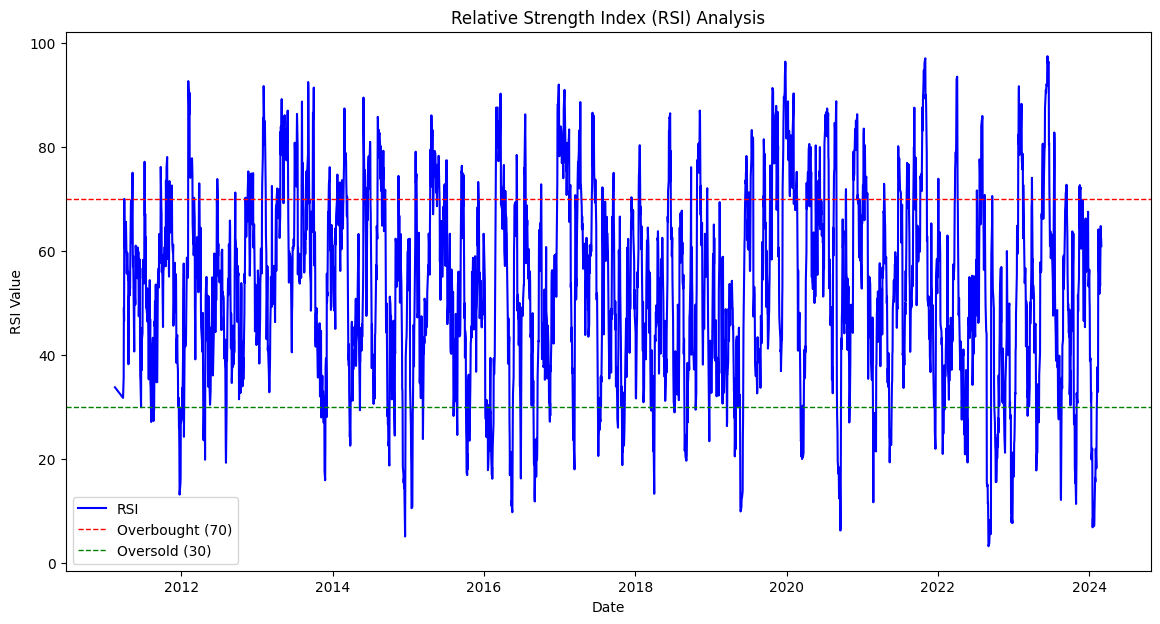

In [8]:
# Calculate daily price change
data['Price_Change'] = data['Close'].diff()

# Calculate the increase and decrease separately
data['Gain'] = data['Price_Change'].apply(lambda x: x if x > 0 else 0)
data['Loss'] = data['Price_Change'].apply(lambda x: -x if x < 0 else 0)

# Calculate the average increase and decrease over 14 days
data['Avg_Gain'] = data['Gain'].rolling(window=14).mean()
data['Avg_Loss'] = data['Loss'].rolling(window=14).mean()

# Calculate RS value (Relative Strength Value)
data['RS'] = data['Avg_Gain'] / data['Avg_Loss']

# Calculating the RSI value
data['RSI'] = 100 - (100 / (1 + data['RS']))

# Visualizing the RSI
plt.figure(figsize=(14, 7))

# Plotting the RSI
plt.plot(data['RSI'], label='RSI', color='blue', linewidth=1.5)

# Draw overbought and oversold reference lines (70 and 30)
plt.axhline(70, color='red', linestyle='--', linewidth=1, label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', linewidth=1, label='Oversold (30)')


plt.title('Relative Strength Index (RSI) Analysis')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.legend()
plt.show()

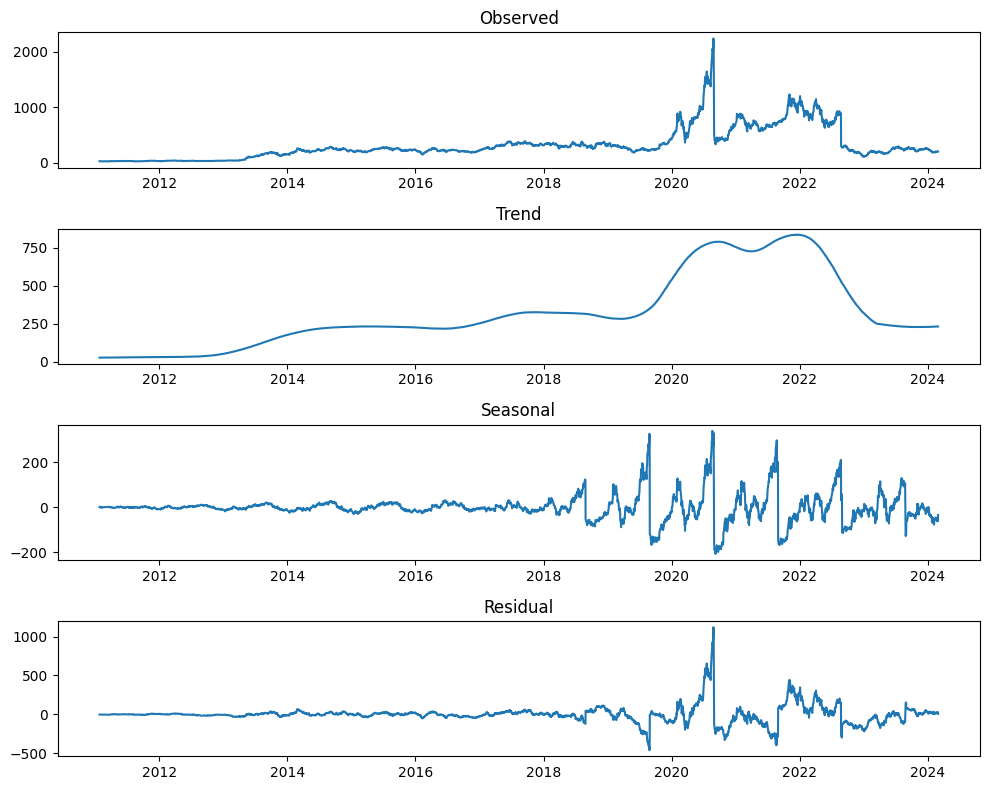

In [9]:
from statsmodels.tsa.seasonal import STL
file_path = 'TSLA.csv'  
data = pd.read_csv(file_path, parse_dates=['Date'])


data.set_index('Date', inplace=True)
data = data.sort_index()


price_series = data['Close']

# Perform STL decomposition and set the period to 252 (there are 252 trading days per year)
stl = STL(price_series, period=252)  # Adjust the cycle according to your data characteristics
result = stl.fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))
ax1.plot(result.observed)
ax1.set_title('Observed')
ax2.plot(result.trend)
ax2.set_title('Trend')
ax3.plot(result.seasonal)
ax3.set_title('Seasonal')
ax4.plot(result.resid)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()

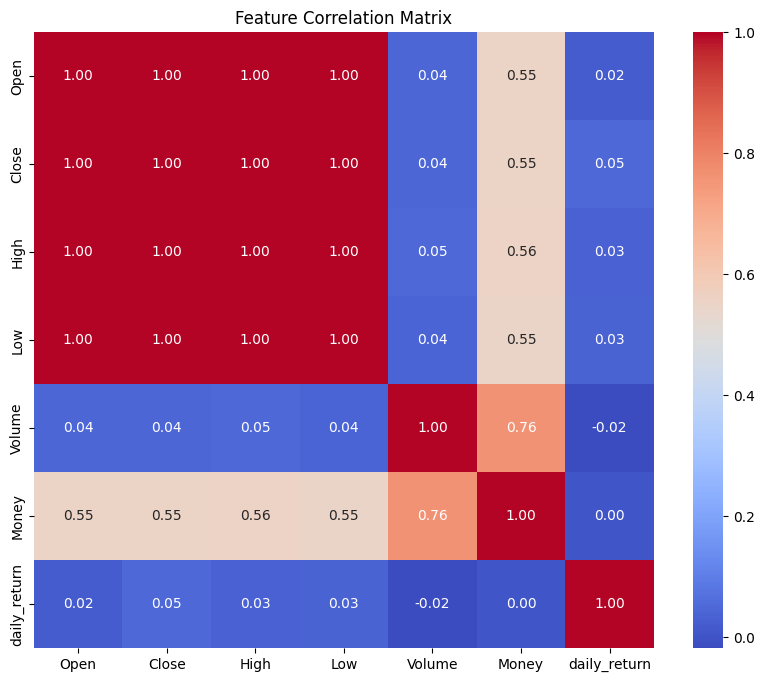

In [11]:
data = pd.read_csv('TSLA.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)



# Calculate feature correlations and plot heatmaps
plt.figure(figsize=(10, 8))
correlation_matrix = data[['Open', 'Close', 'High', 'Low', 'Volume', 'Money', 'daily_return']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

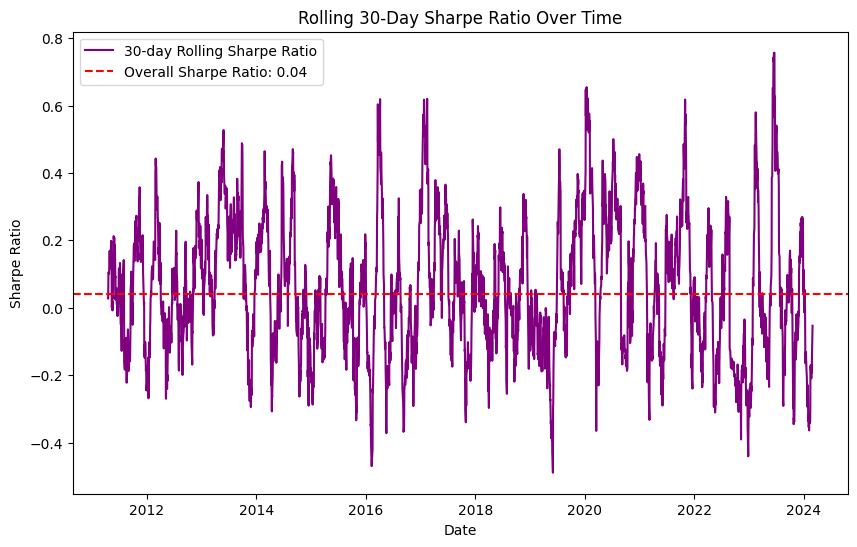

In [12]:

# Average daily return
average_daily_return = data['daily_return'].mean()
# Standard deviation of daily returns
std_dev_daily_return = data['daily_return'].std()
# Sharpe ratio calculation (assuming risk-free rate is zero)
sharpe_ratio = average_daily_return / std_dev_daily_return

# Add Sharpe ratio to data and perform sliding calculation
data['rolling_sharpe'] = data['daily_return'].rolling(window=30).apply(lambda x: np.mean(x) / np.std(x), raw=True)

# Plotting the Sharpe Ratio
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['rolling_sharpe'], color='purple', label='30-day Rolling Sharpe Ratio')
plt.axhline(y=sharpe_ratio, color='red', linestyle='--', label=f'Overall Sharpe Ratio: {sharpe_ratio:.2f}')
plt.title("Rolling 30-Day Sharpe Ratio Over Time")
plt.xlabel("Date")
plt.ylabel("Sharpe Ratio")
plt.legend()
plt.show()